In the previous file, we learned a few design principles and created the visualization below:

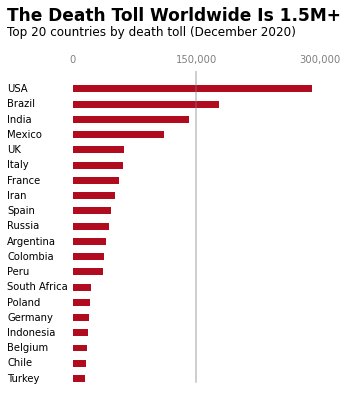

According to some, what we did is storytelling with data. However, is presenting the top 20 countries according to death toll really a story?

In a broad sense, a story is a sequence of events: something happens, then something else happens, and so on. Rather than events, our graph above presents facts.

Another story element is change: something or someone changes throughout the story. Our graph is static: the information we present doesn't show any element of change.

There's nothing wrong with showing facts or presenting static information, but that's not a story. To create a data story, we need to wrap those numerical facts into events that show change.

For our example above, we can take the particular case of the United States and show how the death toll has changed since the beginning of the pandemic. Below, we see an example of a data story:

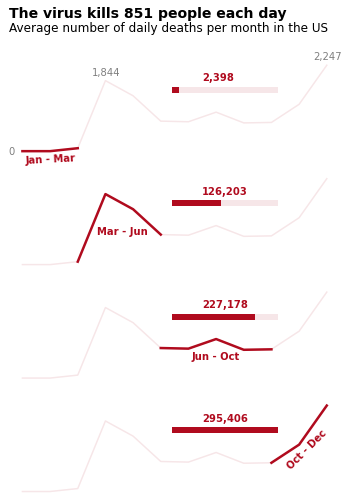

This data story shows the evolution of the death toll in the United States. At the end of March, we see the death toll at 2,398 deaths, but in December, it became 295,406 — it has changed. 

Following the four line plots, we see a sequence of events that led to that change. For instance, a surge in the average number of daily deaths starting in April resulted in a large number of deaths at the end of June.

Note that if we break down the graph, this is still a lot of numerical facts. We've just assembled them into a sequence of events that are logically and temporally connected and create meaning together — a story.

The data story visualization we showed above is the result of using Matplotlib's object-oriented interface. The visualization is a grid chart composed of four different line plots — with a configuration of four rows by one column.


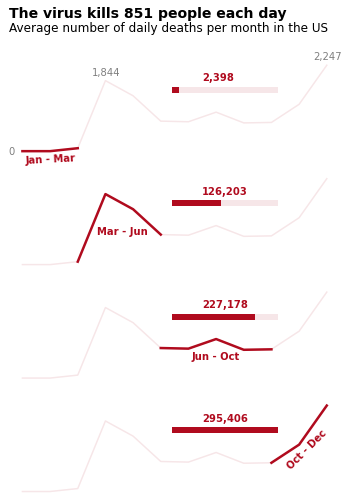

We'll learn how to recreate this graph. We begin with creating a grid chart of four rows by one column using the `plt.subplots()` function. We also adjust the figure size to `(6, 8)` since we want to keep a mobile-friendly ratio.

In [1]:
import matplotlib.pyplot as plt

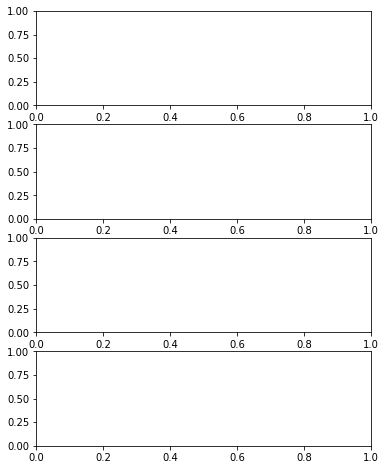

In [2]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,figsize=(6,8))
                                         

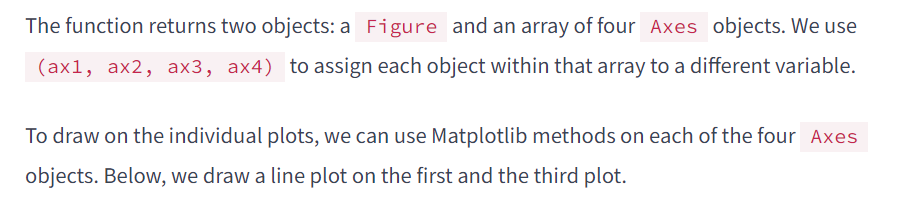

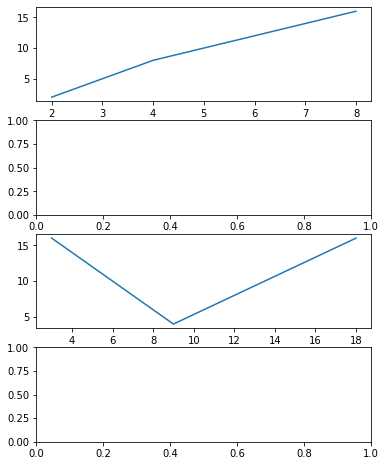

In [3]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                         figsize=(6,8))

ax1.plot([2,4,8],[2,8,16])
ax3.plot([3,9,18],[16,4,16])
plt.show()

Next exercise, we'll draw the four line plots that show the evolution of average daily deaths per month in 2020. We collected the data from the World Health Organization on December 15th, 2020. Below, we see the first five rows of the data:

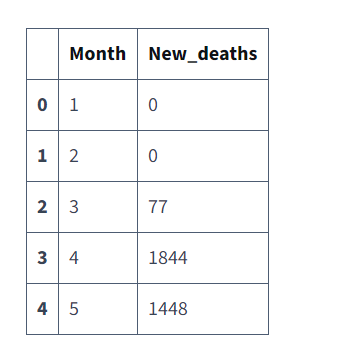

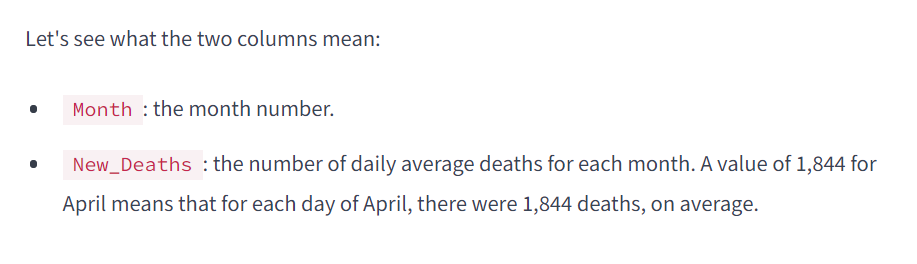

**Task**

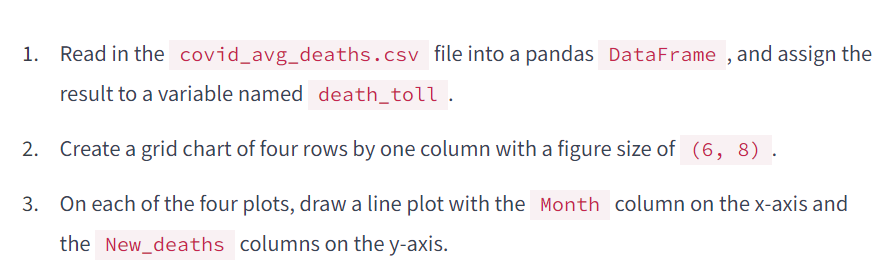

**Answer**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
death_toll = pd.read_csv('covid_avg_deaths.csv')

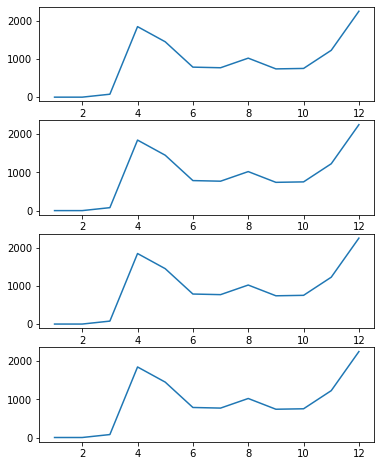

In [5]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                         figsize=(6,8))
ax1.plot(death_toll['Month'], death_toll['New_deaths'])
ax2.plot(death_toll['Month'], death_toll['New_deaths'])
ax3.plot(death_toll['Month'], death_toll['New_deaths'])
ax4.plot(death_toll['Month'], death_toll['New_deaths'])
plt.show()

Since we draw the same plot on each of the four `Axes` objects, we can simplify our work using a `for` loop. First, we group the four `Axes` objects into a Python `list`, and then we iterate over that list:

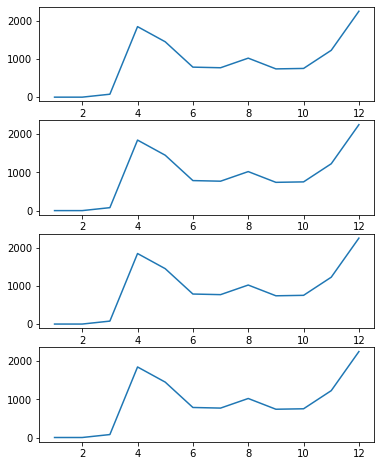

In [6]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                         figsize=(6,8))
axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.plot(death_toll['Month'], death_toll['New_deaths'])
plt.show()

We can also use the loop to apply a change to all Axes objects. Below, for instance, we remove the y- and x-tick labels for all plots:

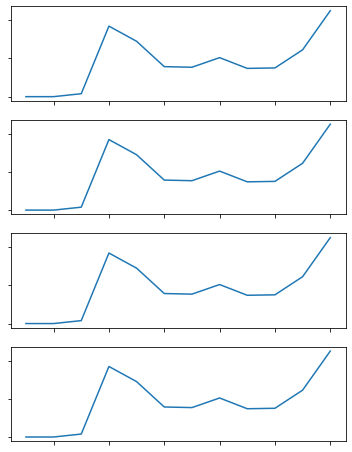

In [7]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                         figsize=(6,8))
axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.plot(death_toll['Month'], death_toll['New_deaths'])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
plt.show()

In the spirit of maximizing the data-ink ratio, let's also remove the ticks and the spines (the x- and y-axes).

**Task**

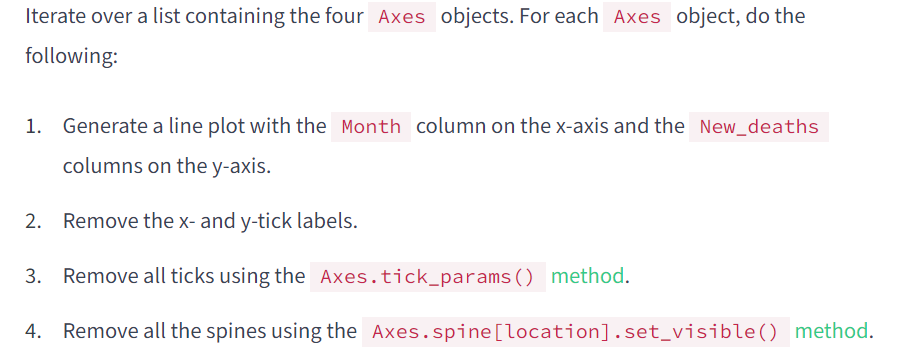

**Answer**

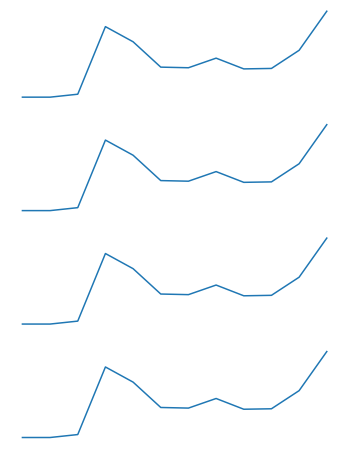

In [8]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                         figsize=(6,8))
axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.plot(death_toll['Month'], death_toll['New_deaths'])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(bottom=0, left=0) 
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)
plt.show()

The storytelling data visualization we first showed emphasizes four periods:

* January–March
* March–June
* June–October
* October–December

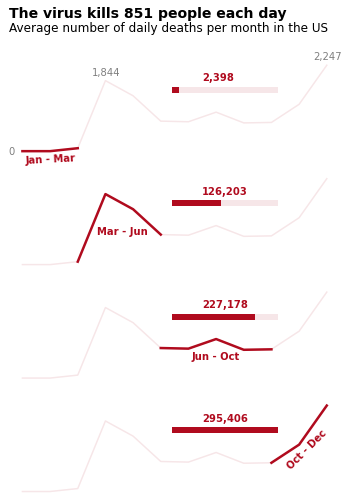

To highlight these four periods, we begin by coloring all plots in a shade of red. Then, we increase their transparency by using the alpha parameter.

In [11]:
axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.plot(death_toll['Month'], death_toll['New_deaths'],color='#b00b1e',
            alpha=0.1)
plt.show()

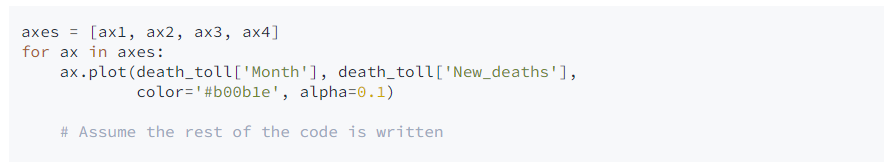

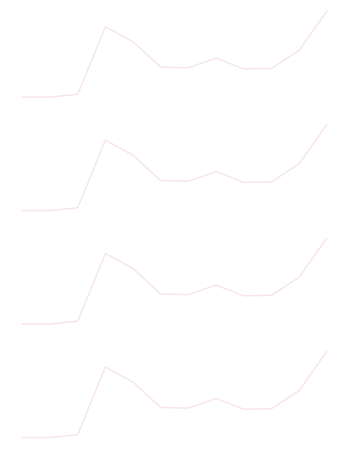

Now, we draw separate line plots on top of the current ones. We begin by drawing the first one — we use the same color and increase the line width using the `linewidth` parameter.

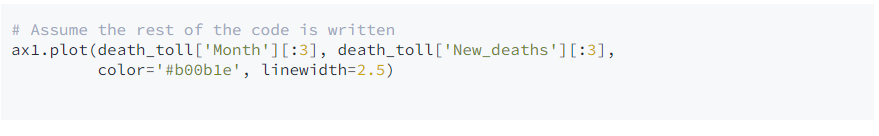

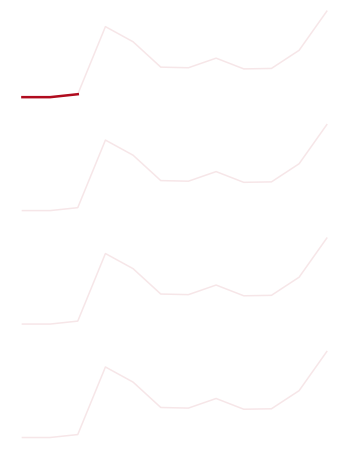

Notice that above we used `ax1` in `ax1.plot()`, not just `ax`. We take the same approach for `ax2`.

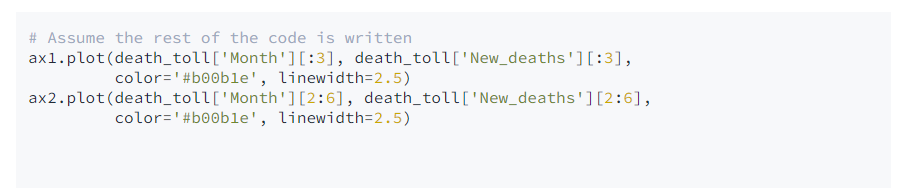

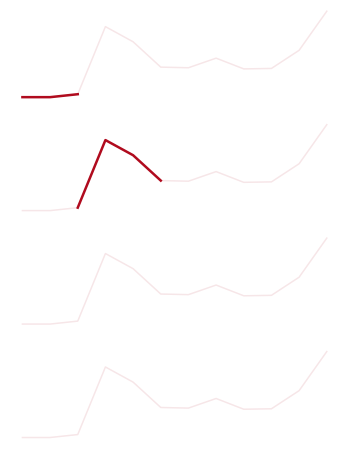

Matplotlib can be very powerful if we're a little imaginative. We'll often want to make a specific change and search for a function that will specifically handle that change. This approach won't always work because the function we want may not exist.

However, it'll often be possible to get what we want by combining what Matplotlib already has. To do that, identify the basic parts of what we want to create. Then, try to create those basic parts using Matplotlib.

Let's now highlight the last two periods: June–October and October–December.

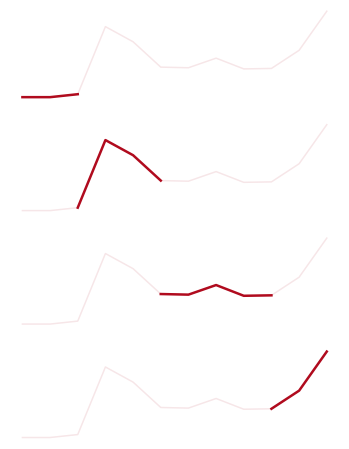

In [14]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                         figsize=(6,8))
axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.plot(death_toll['Month'], death_toll['New_deaths'],
            color='#b00b1e', alpha=0.1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(bottom=0, left=0) 
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)

ax1.plot(death_toll['Month'][:3], death_toll['New_deaths'][:3],
         color='#b00b1e', linewidth=2.5)
ax2.plot(death_toll['Month'][2:6], death_toll['New_deaths'][2:6],
         color='#b00b1e', linewidth=2.5)

ax3.plot(death_toll['Month'][5:10], death_toll['New_deaths'][5:10],
         color='#b00b1e', linewidth=2.5)
ax4.plot(death_toll['Month'][9:12], death_toll['New_deaths'][9:12],
         color='#b00b1e', linewidth=2.5)
plt.show()

Right now, our graph has a very high data-ink ratio, which is good. Except for the four highlighted periods, we can't remove anything without losing important data.

However, we still need to add a few structural elements so the audience can understand the visualization.

First, we're going to show the quantities by adding three labels on the first plot — we do this using the [`Axis.text()` method](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.text.html). We arrived at the exact x- and y-coordinates we see below through a process of trial and error.

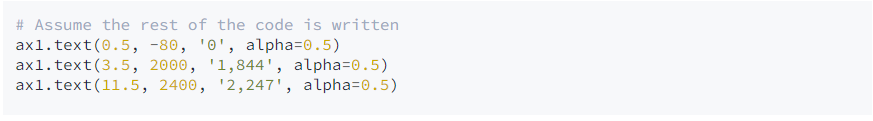

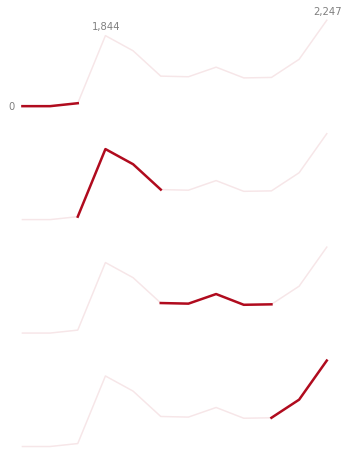

The three labels give the audience a sense of the magnitude and the range of the quantities. We only want to show people a trend, so these three labels are enough. The other three plots are identical, so we don't need to add more ink.

However, if our purpose were to show all quantities, adding only three labels wouldn't be enough. One solution is to show readers a separate table rather than decreasing the data-ink ratio with extra labels.

The three labels we added correspond to the quantities on the x-axis (the average number of daily deaths per month). On the y-axis, we have month names, and we need to make that clear.

Below, we add the 'Jan-Mar' label using `Axes.text()`. Specifically, notice the `rotation` parameter we use to slightly rotate the text.

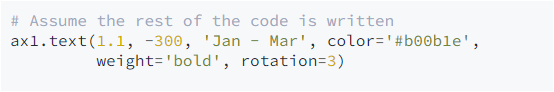

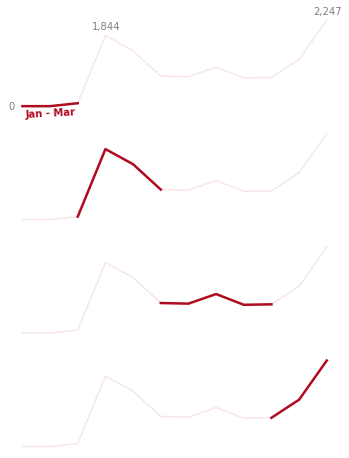

**Task**

Let's now add labels for the other three periods.

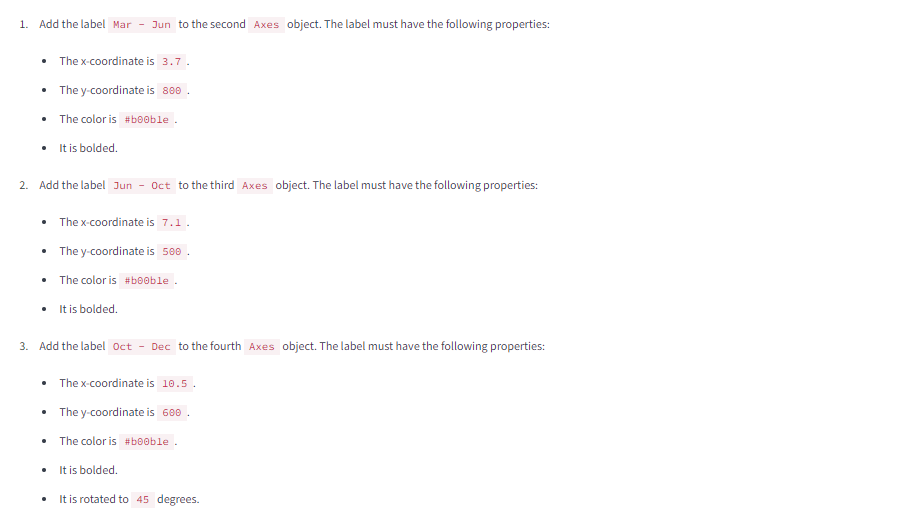

**Answer**

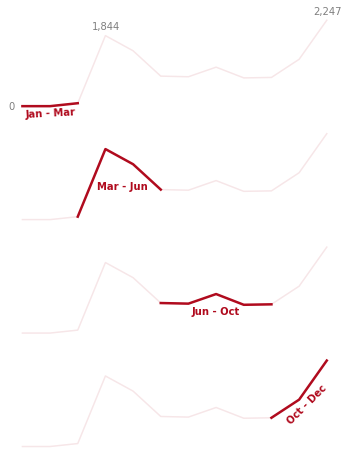

In [15]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                         figsize=(6,8))
axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.plot(death_toll['Month'], death_toll['New_deaths'],
            color='#b00b1e', alpha=0.1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(bottom=0, left=0) 
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)

ax1.plot(death_toll['Month'][:3], death_toll['New_deaths'][:3],
         color='#b00b1e', linewidth=2.5)
ax2.plot(death_toll['Month'][2:6], death_toll['New_deaths'][2:6],
         color='#b00b1e', linewidth=2.5)
ax3.plot(death_toll['Month'][5:10], death_toll['New_deaths'][5:10],
         color='#b00b1e', linewidth=2.5)
ax4.plot(death_toll['Month'][9:12], death_toll['New_deaths'][9:12],
         color='#b00b1e', linewidth=2.5)

ax1.text(0.5, -80, '0', alpha=0.5)
ax1.text(3.5, 2000, '1,844', alpha=0.5)
ax1.text(11.5, 2400, '2,247', alpha=0.5)

ax1.text(1.1, -300, 'Jan - Mar', color='#b00b1e',
         weight='bold', rotation=3)

ax2.text(3.7, 800, 'Mar - Jun', color='#b00b1e', weight='bold')
ax3.text(7.1, 500, 'Jun - Oct', color='#b00b1e', weight='bold')
ax4.text(10.5, 600, 'Oct - Dec', color='#b00b1e', weight='bold',
        rotation=45)
plt.show()

Our visualization is still not readable enough. Readers see four identical plots, a few quantities, and four distinct periods. However, they can't tell what the quantities mean.

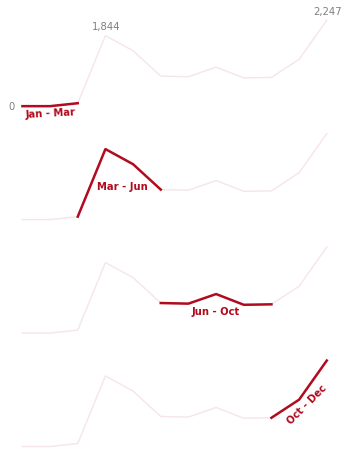

We'll use the subtitle to inform readers about what the quantities describe. Recall from our last file that we should use the title to show more data.

**Task**

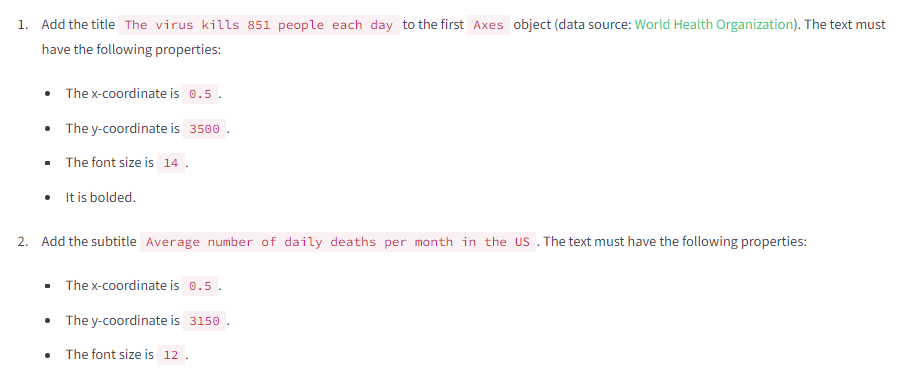

**Answer**

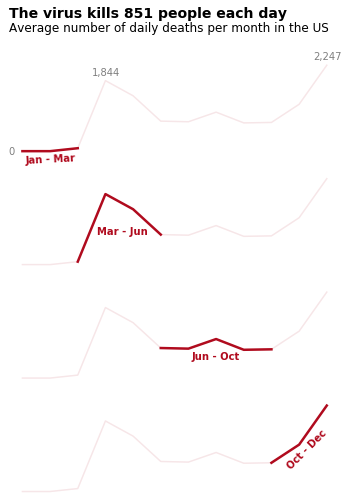

In [16]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                        figsize=(6,8))
axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.plot(death_toll['Month'], death_toll['New_deaths'],
            color='#b00b1e', alpha=0.1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(bottom=0, left=0) 
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)
        
ax1.plot(death_toll['Month'][:3], death_toll['New_deaths'][:3],
         color='#b00b1e', linewidth=2.5)
ax1.text(0.5, -80, '0', alpha=0.5)
ax1.text(3.5, 2000, '1,844', alpha=0.5)
ax1.text(11.5, 2400, '2,247', alpha=0.5)
ax1.text(1.1, -300, 'Jan - Mar', color='#b00b1e',
         weight='bold', rotation=3)

ax2.plot(death_toll['Month'][2:6], death_toll['New_deaths'][2:6],
         color='#b00b1e', linewidth=2.5)
ax2.text(3.7, 800, 'Mar - Jun', color='#b00b1e', weight='bold')

ax3.plot(death_toll['Month'][5:10], death_toll['New_deaths'][5:10],
         color='#b00b1e', linewidth=2.5)
ax3.text(7.1, 500, 'Jun - Oct', color='#b00b1e', weight='bold')

ax4.plot(death_toll['Month'][9:12], death_toll['New_deaths'][9:12],
         color='#b00b1e', linewidth=2.5)
ax4.text(10.5, 600, 'Oct - Dec', color='#b00b1e', weight='bold',
        rotation=45)

ax1.text(0.5, 3500, 'The virus kills 851 people each day',
         size=14, weight='bold')
ax1.text(0.5, 3150, 'Average number of daily deaths per month in the US',
         size=12) 
plt.show()

The last thing we're going to add to our visualization is a progress bar.

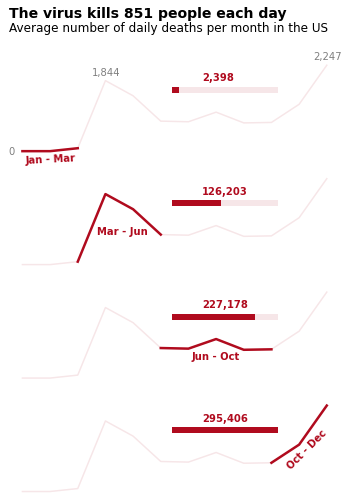

The progress bars follow the change in the total number of cumulative deaths over the four highlighted periods. They represent a detailed breakdown of the death toll in the United States. Assuming our audience has already seen the graph below, we don't need to explain the progress bar.

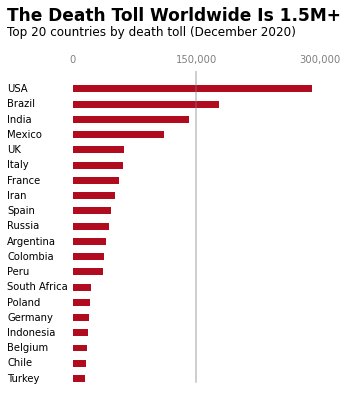

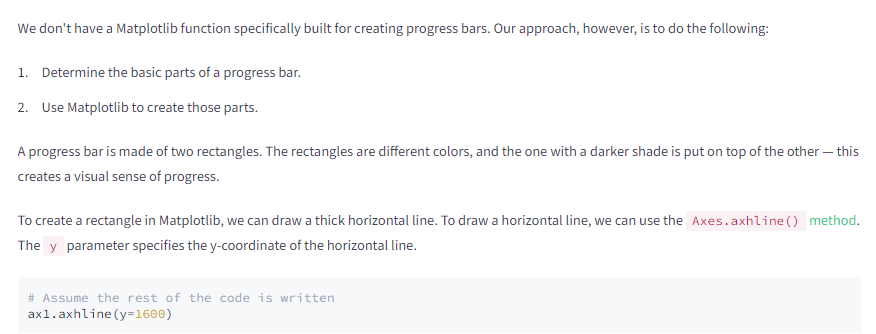

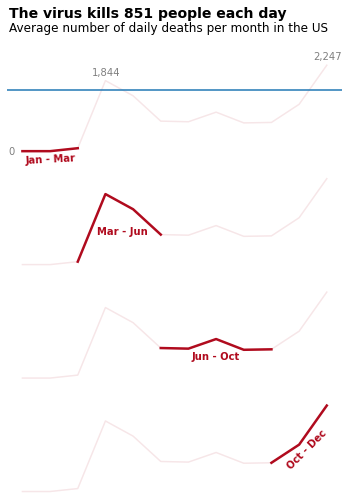

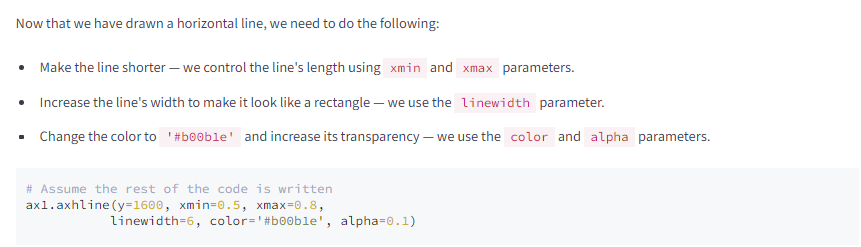

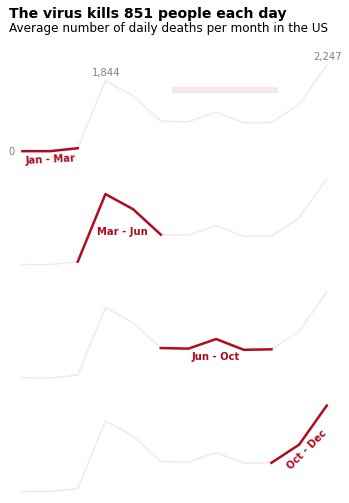

**Task**

Now let's draw this line on all four plots.

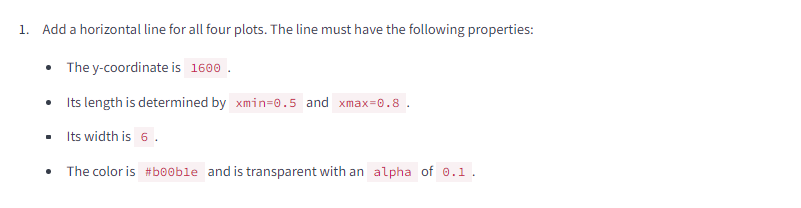

**Answer**

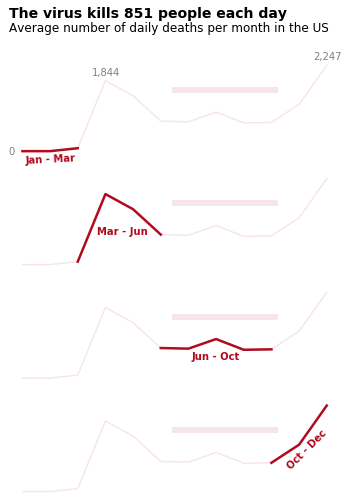

In [18]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                        figsize=(6,8))
axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.plot(death_toll['Month'], death_toll['New_deaths'],
            color='#b00b1e', alpha=0.1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(bottom=0, left=0) 
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)
        
ax1.plot(death_toll['Month'][:3], death_toll['New_deaths'][:3],
         color='#b00b1e', linewidth=2.5)
ax1.text(0.5, -80, '0', alpha=0.5)
ax1.text(3.5, 2000, '1,844', alpha=0.5)
ax1.text(11.5, 2400, '2,247', alpha=0.5)
ax1.text(1.1, -300, 'Jan - Mar', color='#b00b1e',
         weight='bold', rotation=3)
ax1.text(0.5, 3500, 'The virus kills 851 people each day',
         size=14, weight='bold')
ax1.text(0.5, 3150, 'Average number of daily deaths per month in the US',
         size=12) 

ax2.plot(death_toll['Month'][2:6], death_toll['New_deaths'][2:6],
         color='#b00b1e', linewidth=2.5)
ax2.text(3.7, 800, 'Mar - Jun', color='#b00b1e', weight='bold')

ax3.plot(death_toll['Month'][5:10], death_toll['New_deaths'][5:10],
         color='#b00b1e', linewidth=2.5)
ax3.text(7.1, 500, 'Jun - Oct', color='#b00b1e', weight='bold')

ax4.plot(death_toll['Month'][9:12], death_toll['New_deaths'][9:12],
         color='#b00b1e', linewidth=2.5)
ax4.text(10.5, 600, 'Oct - Dec', color='#b00b1e', weight='bold',
        rotation=45)

for ax in axes:
    ax.axhline(y=1600, xmin=0.5, xmax=0.8,
               linewidth=6, color='#b00b1e',
               alpha=0.1)    
'''
Alternatively, we can integrate this code
inside the first for loop above.
'''

plt.show()

Above we added a horizontal line to each plot. For each line, we now need to add a new line on top of each to create a visual sense of progress.

In the `for` loop below, we add a new horizontal line to each plot:

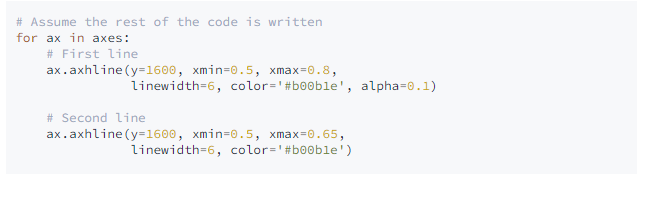

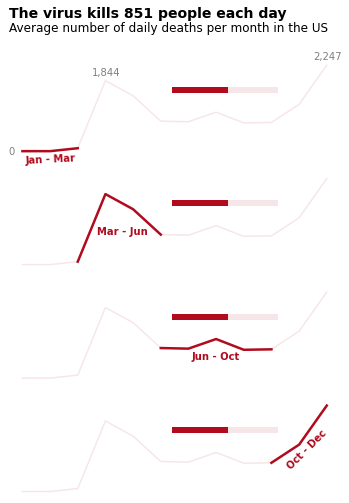

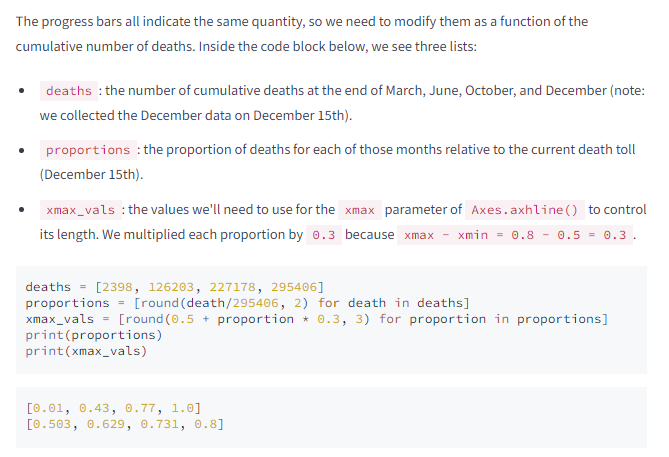

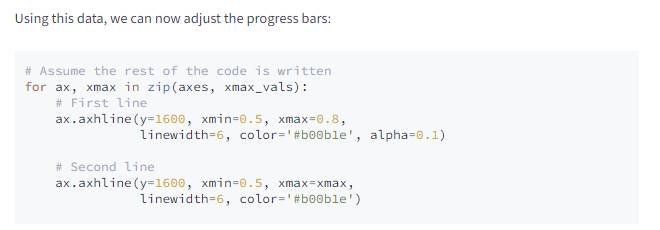

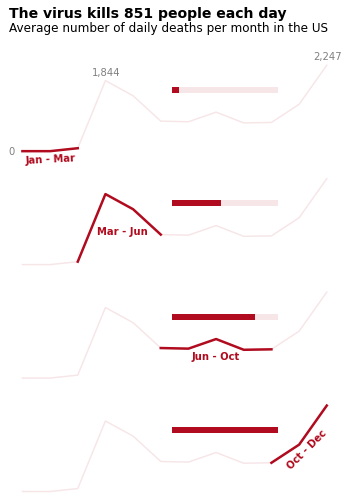

**Task**

Now let's add the text above the progress bars. We will use the following loop in our code;

`for ax, xmax, death in zip(axes, xmax_vals, deaths):
    ax.axhline(y=1600, xmin=0.5, xmax=0.8,
               linewidth=6, color='#b00b1e',
               alpha=0.1)
    ax.axhline(y=1600, xmin=0.5, xmax=xmax,
               linewidth=6, color='#b00b1e')`
    `# we'll complete from here`
    
Inside the `for` loop, call a Matplotlib method to add the text representing the cumulative number of deaths above each progress bar. The text must have the following properties:

* The x-coordinate is `7.5`.
* The y-coordinate is `1850`.
* The color is `#b00b1e`.
* It's bolded.
* Each number has a comma as a thousands separator. We can use the [`format()` function](https://docs.python.org/3/library/functions.html#format) to simplify our work. For instance, `format(5000, ',')` outputs the string `5,000`.

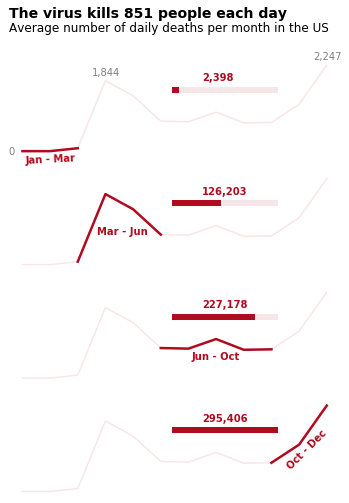

In [20]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                        figsize=(6,8))
axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.plot(death_toll['Month'], death_toll['New_deaths'],
            color='#b00b1e', alpha=0.1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(bottom=0, left=0) 
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)
        
ax1.plot(death_toll['Month'][:3], death_toll['New_deaths'][:3],
         color='#b00b1e', linewidth=2.5)
ax1.text(0.5, -80, '0', alpha=0.5)
ax1.text(3.5, 2000, '1,844', alpha=0.5)
ax1.text(11.5, 2400, '2,247', alpha=0.5)
ax1.text(1.1, -300, 'Jan - Mar', color='#b00b1e',
         weight='bold', rotation=3)
ax1.text(0.5, 3500, 'The virus kills 851 people each day',
         size=14, weight='bold')
ax1.text(0.5, 3150, 'Average number of daily deaths per month in the US',
         size=12) 

ax2.plot(death_toll['Month'][2:6], death_toll['New_deaths'][2:6],
         color='#b00b1e', linewidth=2.5)
ax2.text(3.7, 800, 'Mar - Jun', color='#b00b1e', weight='bold')


ax3.plot(death_toll['Month'][5:10], death_toll['New_deaths'][5:10],
         color='#b00b1e', linewidth=2.5)
ax3.text(7.1, 500, 'Jun - Oct', color='#b00b1e', weight='bold')


ax4.plot(death_toll['Month'][9:12], death_toll['New_deaths'][9:12],
         color='#b00b1e', linewidth=2.5)
ax4.text(10.5, 600, 'Oct - Dec', color='#b00b1e', weight='bold',
        rotation=45)

deaths = [2398, 126203, 227178, 295406]
proportions = [round(death/295406, 2) for death in deaths]
xmax_vals = [round(0.5 + proportion * 0.3, 3) for proportion in proportions]

for ax, xmax, death in zip(axes, xmax_vals, deaths):
    ax.axhline(y=1600, xmin=0.5, xmax=0.8,
               linewidth=6, color='#b00b1e',
               alpha=0.1)
    ax.axhline(y=1600, xmin=0.5, xmax=xmax,
               linewidth=6, color='#b00b1e')
    ax.text(7.5, 1850, format(death, ','),
            color='#b00b1e', weight='bold')

plt.show()

In this file, we learned two main things:

* A data story is a sequence of events that are logically and temporally connected and have meaning together — simply showing facts doesn't add up to a story.
* How to create a storytelling data visualization with Matplotlib.

In the next file, we're going to learn how to create visual patterns using **Gestalt principles**, and how to guide the audience's attention with **pre-attentive attributes**.